<a href="https://colab.research.google.com/github/Ayo-Cyber/Deep-Learning/blob/main/Image_Classification_Using_Keras_Small_Images_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #for reading in data and data manipulations
import numpy as np #for performing mathematical functions 


import tensorflow as tf#for building deep learning models 
from tensorflow import keras

# seaborn and matplotlib are used for data visualization 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.cifar10.load_data() #loading in the datasets from keras small images dataset

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
X_train.shape #checking the shape of the X_train data frame

(50000, 32, 32, 3)

In [4]:
X_train[0][0] #printing out the first index in the X_train data frame

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [5]:
#Creating a function to plot out each image in the dataset

def plot_sample(index): #declaring the function name and parameter
  plt.figure(figsize = (10,1)) #inputing the image size 
  plt.imshow(X_train[index]) #Plotting the image using the imshow by there index

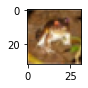

In [6]:
plot_sample(0)

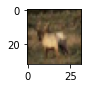

In [7]:
plot_sample(3) 

In [8]:
#Creating a classes array with respect the arrangement of the image names in the keras dataset
classes = ["airplane" , "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" ,"truck"]

In [9]:
classes[y_train[3][0]]

'deer'

In [10]:

#scaling the X_train and X_test values by dividing them by 255 
#this makes the range of there values range from 0 to 1 
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [11]:
X_train_scaled.shape 
#Confirming that the shape of the X_train_scaled is still the same as the X_train in the first instance

(50000, 32, 32, 3)

In [12]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train_categorical = keras.utils.to_categorical(
    y_train , num_classes=10 , dtype='float32'
)
#Encoding the y_train variables into and array using the keras to_categorical function 
#This works like the One Hot Encoding function in sklearn 
#It replaces indexes where values are absent with zero's and indexes where are present with one's

In [14]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
y_test_catgorical = keras.utils.to_categorical(
    y_test , num_classes =10 , dtype='float32'
)

In [16]:

#model building phase of our Program
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (32,32,3)), #flatten the layer because of it's shape
                          keras.layers.Dense(3000 , activation="relu"), #Creating a dense layer of 3000 to be able to match in some ways with the new shape
                          keras.layers.Dense(1000 , activation="relu"), 
                          keras.layers.Dense(10 , activation="sigmoid") #Using the sigmoid function is critical in classification models that's why it's being used here
])

model.compile(optimizer='SGD',
              loss="categorical_crossentropy", #The categorical crossentropy is considered based on the fact that the y_train values are in a categorical format and not sparsely distributed 
              metrics=['accuracy'])

model.fit(X_train_scaled , y_train_categorical , epochs= 50)

#Though 50 epochs was specified but because the program and model is being run on a cpu it would take more time for computation so i would cut it shut to 10 .

Epoch 1/50
1563/1563 [==============================] - 103s 66ms/step - loss: 1.8134 - accuracy: 0.3526
Epoch 2/50
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6231 - accuracy: 0.4248
Epoch 3/50
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5425 - accuracy: 0.4576
Epoch 4/50
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4828 - accuracy: 0.4774
Epoch 5/50
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4320 - accuracy: 0.4961
Epoch 6/50
1563/1563 [==============================] - 102s 66ms/step - loss: 1.3907 - accuracy: 0.5101
Epoch 7/50
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3531 - accuracy: 0.5249
Epoch 8/50
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3165 - accuracy: 0.5390
Epoch 9/50
1563/1563 [==============================] - 105s 67ms/step - loss: 1.2860 - accuracy: 0.5510
Epoch 10/50
1563/1563 [==============================] 

KeyboardInterrupt: ignored

In [19]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

'cat'

In [17]:
classes[y_test[0][0]]

'cat'

From Evaluation We Can see That The Model Is Working Well . I will go ahead and make some other predictions to see how good it's working now .


In [26]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

'ship'

In [25]:
classes[y_test[1][0]]

'ship'

In [29]:
classes[np.argmax(model.predict(X_test_scaled)[3])]

'ship'

In [30]:
classes[y_test[3][0]]

'airplane'

Insome cases the predictions are wrong but we could always improve the quality of the model , i wont be doing that though cause of the computation time it would take to train the model using a cpu .